In [2]:
import pandas   as pd
import numpy    as np
import networkx as nx

In [3]:
def load_data(file):
    with open(file, "r") as train_file:
        data = []
        for line in train_file:
            row = dict()
            for i in line.split(";")[:-1]:
                j = i.split(":")
                row[int(j[0])] = float(j[1])
            data.append(row)

        return data

In [22]:
train = load_data("cascades_train.txt")
test  = load_data("cascades_test.txt")

In [23]:
train

[{3: 4.0,
  4: 10.0,
  5: 8.0,
  8: 3.0,
  12: 7.0,
  20: 7.0,
  26: 1.0,
  34: 9.0,
  41: 2.0,
  42: 2.0,
  43: 4.0,
  47: 6.0,
  48: 6.0,
  50: 7.0,
  52: 8.0,
  54: 9.0,
  55: 7.0,
  56: 1.0,
  61: 5.0,
  73: 4.0,
  82: 11.0,
  84: 5.0,
  86: 5.0,
  89: 3.0,
  93: 2.0,
  96: 7.0,
  98: 5.0},
 {3: 9.0,
  6: 3.0,
  7: 2.0,
  8: 5.0,
  11: 7.0,
  17: 4.0,
  20: 8.0,
  26: 1.0,
  30: 6.0,
  36: 2.0,
  37: 5.0,
  40: 5.0,
  42: 2.0,
  47: 3.0,
  48: 3.0,
  52: 4.0,
  54: 7.0,
  57: 7.0,
  60: 4.0,
  62: 5.0,
  63: 4.0,
  65: 7.0,
  68: 4.0,
  70: 11.0,
  72: 3.0,
  73: 6.0,
  74: 1.0,
  75: 8.0,
  79: 6.0,
  82: 9.0,
  90: 6.0,
  95: 2.0,
  97: 1.0,
  99: 10.0},
 {2: 4.0,
  3: 6.0,
  4: 1.0,
  7: 4.0,
  8: 5.0,
  9: 7.0,
  16: 3.0,
  17: 4.0,
  19: 6.0,
  23: 4.0,
  25: 5.0,
  29: 5.0,
  34: 6.0,
  35: 1.0,
  39: 4.0,
  46: 3.0,
  47: 4.0,
  48: 5.0,
  58: 4.0,
  60: 4.0,
  64: 3.0,
  67: 7.0,
  68: 6.0,
  71: 5.0,
  72: 5.0,
  73: 7.0,
  81: 1.0,
  89: 8.0,
  94: 2.0},
 {42: 1.0, 58: 2.

In [5]:
globalRand = np.random.RandomState()

In [6]:
def infect(sources, probaGraph, rand = globalRand):
    r = set()
    for s in sources :
        for n,d in probaGraph[s].items() :
            p = d["proba"]
            if rand.rand() < p : r.add(n)
    return sources | r

In [14]:
testProba = nx.from_dict_of_dicts({100:{200 : {"proba" : 0.1}, 201 : {"proba" : 0.2}, 202 : {"proba" : 0.8}}, 200:{300 : {"proba" : 0.5}}})

/home/anti/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/anti/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/anti/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/anti/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

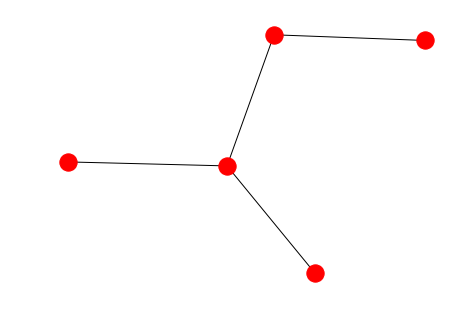

In [18]:
import matplotlib.pyplot as plt
nx.draw(testProba)
plt.show()

In [8]:
x = {100}
for i in range(10):
    print(x)
    x = infect(x, testProba)

{100}
{100}
{202, 100}
{100, 201, 202}
{100, 201, 202}
{100, 201, 202}
{100, 201, 202}
{201, 202, 100}
{100, 200, 201, 202}
{100, 200, 201, 202}


In [9]:
np.random.rand()

0.1955178090734303

In [10]:
def prob(graph, theta, u):
    p = 0
    for n,d in graph.pred(u).items() :
        p *= d["proba"]
    return p
    